<a href="https://colab.research.google.com/github/MatteoGandetto/Corso_ML_con_Python/blob/master/Clustering_GERARCHICO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES

In [0]:
# package for scientific computing
import numpy as np

#collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt 

#data analysis and manipulation tool
import pandas as pd 


# LOAD DATASET

feature:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 classes:  ['setosa' 'versicolor' 'virginica'] 

dimensione features vector (150, 4)
dimensione labels vector (150,)


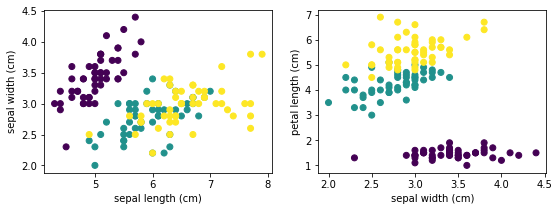

In [2]:
from sklearn import datasets

import matplotlib.pyplot as plt

#load iris dataset
# 3 classes, 4 features,150 samples per features
iris = datasets.load_iris()
#print(iris)

print ('feature: ',iris.feature_names,'\n classes: ',iris.target_names,'\n')
#print(iris.DESCR,'\n')

data = iris.data
labels = iris.target

print('dimensione features vector',data.shape)
print('dimensione labels vector',labels.shape)

fig,ax=plt.subplots(1,2)
fig.set_size_inches(9,3)
for axis,i in zip(ax,range(0,2)):
  axis.scatter(data[:,i],data[:,i+1],c=labels)
  axis.set_xlabel(iris.feature_names[i])
  axis.set_ylabel(iris.feature_names[i+1])

plt.show()




# AGGLOMERATIVE CLUSTERING - I USE

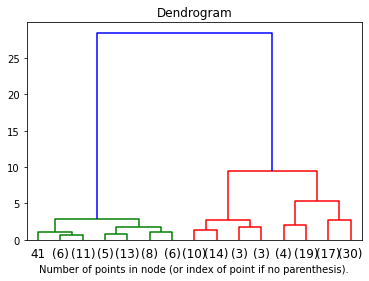

In [3]:
from sklearn import datasets
from sklearn import metrics

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

#iris dataset
X=data[:,1:3]
axes_labes=iris.feature_names
axes_labes=axes_labes[1:3]

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(agglCl.children_.shape[0])
    n_samples = len(agglCl.labels_)
    for i, merge in enumerate(agglCl.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([agglCl.children_, agglCl.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
agglCl = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

agglCl = agglCl.fit(X)
plt.title('Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(agglCl, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# AGGLOMERATIVE CLUSTERING - II USE

Number of clusters: 3
Homogeneity: 0.754
Completeness: 0.789
V-measure: 0.771
Adjusted Rand Index: 0.696
Adjusted Mutual Information: 0.768
Silhouette Coefficient: 0.606


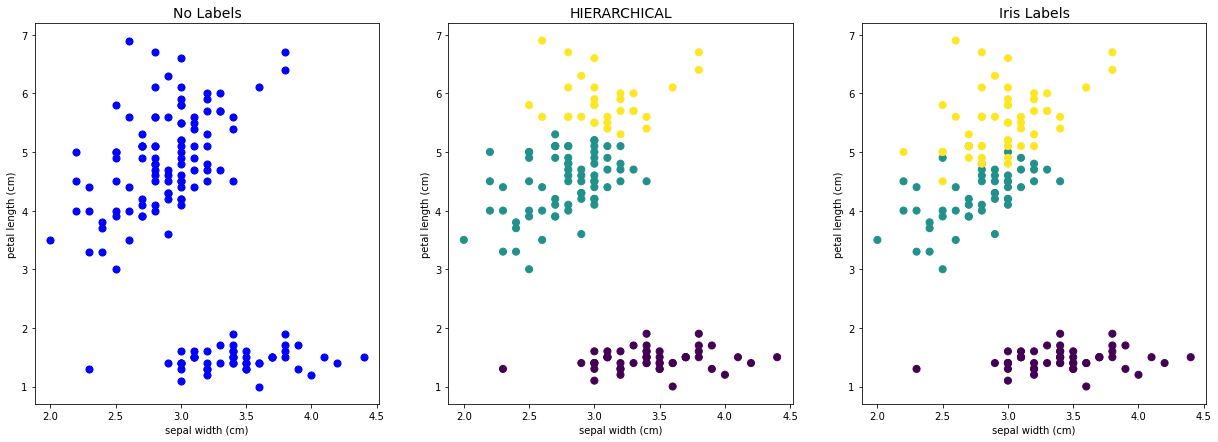

In [7]:
from sklearn import datasets
from sklearn import metrics

from sklearn.cluster import AgglomerativeClustering

X=data[:,1:3]
axes_labes=iris.feature_names
axes_labes=axes_labes[1:3]

clusters=3

#affinity , default=’euclidean’
#Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, 
#“manhattan”, “cosine”, or “precomputed”. If linkage is “ward”,
# only “euclidean” is accepted.

#linkage{“ward”, “complete”, “average”, “single”}, default=”ward”
#Which linkage criterion to use. The linkage criterion determines 
#which distance to use between sets of observation. 
#The algorithm will merge the pairs of cluster that minimize this criterion.
# ward minimizes the variance of the clusters being merged.
# average uses the average of the distances of each observation of the two sets.
# complete or maximum linkage uses the maximum distances between all 
# observations of the two sets.
# single uses the minimum of the distances between all observations 
# of the two sets.

agglCl = AgglomerativeClustering(n_clusters=clusters,
                                 linkage="average", 
                                 affinity='euclidean'
)

labels_=agglCl.fit_predict(X)

cluster_labels = ('b', labels_, iris.target)
title =('No Labels','HIERARCHICAL','Iris Labels',)
fig,ax = plt.subplots(1,len(cluster_labels), figsize=(21,7))

for i, label in enumerate(cluster_labels):
  ax[i].scatter(X[:, 0], X[:, 1], c=label, s=50)
  ax[i].set_xlabel(axes_labes[0])
  ax[i].set_ylabel(axes_labes[1])
  ax[i].set_title(title[i], fontsize=14)

print('Number of clusters: %d' % clusters)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(iris.target, labels_))
print("Completeness: %0.3f" % metrics.completeness_score(iris.target, labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(iris.target, labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(iris.target, labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(iris.target, labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels_))
